In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.colors import LogNorm
import cooler
from cooltools.expected import logbin_expected, diagsum, combine_binned_expected
import warnings
warnings.filterwarnings('ignore')

/DATA/users/magnitov/software/anaconda3/lib/python3.8/site-packages/cooltools/lib/numutils.py:11: FutureWarning: The `cooler.tools` module is deprecated in v0.9 and will be removed in v0.10. Use `cooler.parallel` instead.
  from ._numutils import (
/DATA/users/magnitov/software/anaconda3/lib/python3.8/site-packages/cooltools/api/expected.py:14: FutureWarning: The `cooler.tools` module is deprecated in v0.9 and will be removed in v0.10. Use `cooler.parallel` instead.
  from cooler.tools import partition
/DATA/users/magnitov/software/anaconda3/lib/python3.8/site-packages/cooltools/expected.py:12: FutureWarning: The `cooler.tools` module is deprecated in v0.9 and will be removed in v0.10. Use `cooler.parallel` instead.
  from cooler.tools import partition


## Scalings

In [4]:
def get_scaling_and_derivative(experiment):
    c = cooler.Cooler('/DATA/users/magnitov/znf143/hic/coolers/' + experiment + '.mm10.mapq_30.5000.mcool::resolutions/5000')
    exp = pd.read_csv('/DATA/users/magnitov/znf143/hic/expected/' + experiment + '_oe_cis_100K.tsv', sep = '\t')
    resolution = c.info["bin-size"]
    binned_exp, binned_slope, bins = logbin_expected(exp)
    scaling, derivative = combine_binned_expected(binned_exp, binned_slope, spread_funcs = 'logstd')
    return(scaling, derivative, resolution)

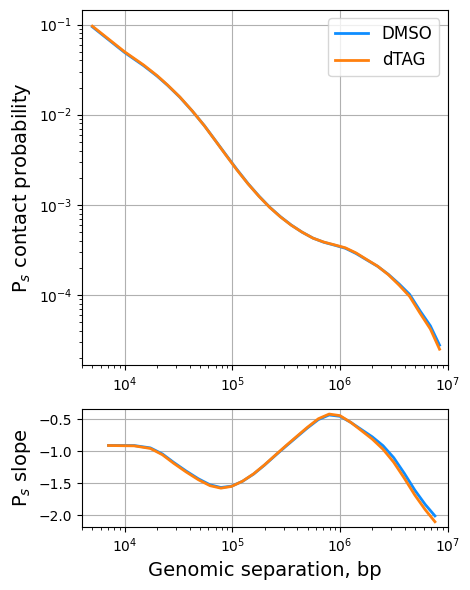

In [6]:
scaling1, derivative1, resolution1 = get_scaling_and_derivative('ZFP143_DMSO')
scaling2, derivative2, resolution2 = get_scaling_and_derivative('ZFP143_dTAG_6h')

plt.figure(figsize = (4.8, 6))
spec = gridspec.GridSpec(ncols = 1, nrows = 2, height_ratios = [3, 1])

plt.subplot(spec[0])
plt.plot(scaling1['diag.avg'] * resolution1, scaling1['balanced.avg'], zorder = 3, label = 'DMSO', lw = 2, color = '#0E8DFF')
plt.plot(scaling2['diag.avg'] * resolution2, scaling2['balanced.avg'], zorder = 3, label = 'dTAG', lw = 2, color = '#FF800E')
plt.ylabel('P$_s$ contact probability', fontsize = 14)
plt.xscale('log')
plt.yscale('log')
plt.xlim((4000, 10000000))
plt.grid(zorder = 0)
plt.legend(loc = 'upper right', fontsize = 12)

plt.subplot(spec[1])
plt.plot(derivative1['diag.avg'] * resolution1, derivative1['slope'], zorder = 3, label = 'DMSO', lw = 2, color = '#0E8DFF')
plt.plot(derivative2['diag.avg'] * resolution2, derivative2['slope'], zorder = 3, label = 'dTAG', lw = 2, color = '#FF800E')
plt.ylabel('P$_s$ slope', fontsize = 14)
plt.xlabel('Genomic separation, bp', fontsize = 14)
plt.xscale('log')
plt.xlim((4000, 10000000))
plt.grid(zorder = 0)

plt.tight_layout()
plt.show()

## Hi-C loops

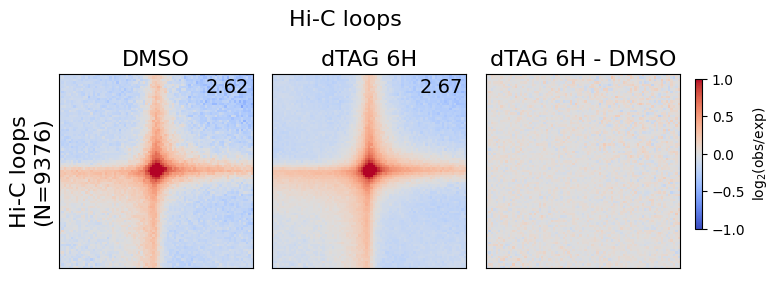

In [13]:
dmso_hic = pd.read_csv('./piles_loops/ZFP143_DMSO_bonev_2017_hic_loops.txt', skiprows = 35, sep = '\s+', header = None).values
dtag_hic = pd.read_csv('./piles_loops/ZFP143_dTAG_6h_bonev_2017_hic_loops.txt', skiprows = 35, sep = '\s+', header = None).values

################
fig = plt.figure(figsize = (7, 3))
plt.suptitle('Hi-C loops', fontsize = 16)

ax = fig.add_subplot(131)
p1 = ax.matshow(np.log2(dmso_hic), cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.text(79, 7, str(round(np.mean([x[39:42] for x in dmso_hic[39:42]]), 2)), ha = 'right', fontsize = 14)
plt.title('DMSO', fontsize = 16)
plt.ylabel('Hi-C loops\n(N=9376)', fontsize = 16)
plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(132)
p2 = ax.matshow(np.log2(dtag_hic), cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.text(79, 7, str(round(np.mean([x[39:42] for x in dtag_hic[39:42]]), 2)), ha = 'right', fontsize = 14)
plt.title('dTAG 6H', fontsize = 16)
plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(133)
p3 = ax.matshow(np.log2(dtag_hic)-np.log2(dmso_hic), cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('dTAG 6H - DMSO', fontsize = 16)
plt.xticks([], [])
plt.yticks([], [])
    
cbar_ax = fig.add_axes([1, 0.25, 0.01, 0.5])
cbar = plt.colorbar(p3, cax = cbar_ax)
cbar.set_label('log$_{2}$(obs/exp)', fontsize = 10)
    
plt.tight_layout()
plt.show()

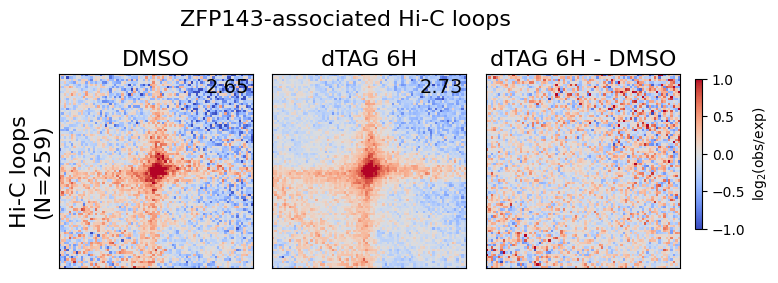

In [14]:
dmso_hic = pd.read_csv('/DATA/users/magnitov/znf143/hic/piles_loops_tads/ZFP143_DMSO_bonev_2017_hic_loops.overlap_zfp143.txt', skiprows = 35, sep = '\s+', header = None).values
dtag_hic = pd.read_csv('/DATA/users/magnitov/znf143/hic/piles_loops_tads/ZFP143_dTAG_6h_bonev_2017_hic_loops.overlap_zfp143.txt', skiprows = 35, sep = '\s+', header = None).values

################
fig = plt.figure(figsize = (7, 3))
plt.suptitle('ZFP143-associated Hi-C loops', fontsize = 16)

ax = fig.add_subplot(131)
p1 = ax.matshow(np.log2(dmso_hic), cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.text(79, 7, str(round(np.mean([x[39:42] for x in dmso_hic[39:42]]), 2)), ha = 'right', fontsize = 14)
plt.title('DMSO', fontsize = 16)
plt.ylabel('Hi-C loops\n(N=259)', fontsize = 16)
plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(132)
p2 = ax.matshow(np.log2(dtag_hic), cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.text(79, 7, str(round(np.mean([x[39:42] for x in dtag_hic[39:42]]), 2)), ha = 'right', fontsize = 14)
plt.title('dTAG 6H', fontsize = 16)
plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(133)
p3 = ax.matshow(np.log2(dtag_hic)-np.log2(dmso_hic), cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('dTAG 6H - DMSO', fontsize = 16)
plt.xticks([], [])
plt.yticks([], [])
    
cbar_ax = fig.add_axes([1, 0.25, 0.01, 0.5])
cbar = plt.colorbar(p3, cax = cbar_ax)
cbar.set_label('log$_{2}$(obs/exp)', fontsize = 10)
    
plt.tight_layout()
plt.show()

## Classified loops from Micro-C

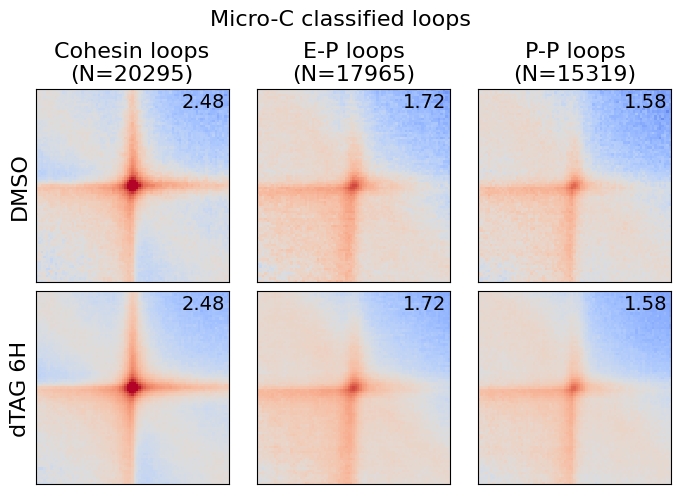

In [15]:
dmso_cohesin = pd.read_csv('./piles_loops/ZFP143_DMSO_hsieh_2022_cohesin_loops.txt', skiprows = 35, sep = '\s+', header = None).values
dtag_cohesin = pd.read_csv('./piles_loops/ZFP143_dTAG_6h_hsieh_2022_cohesin_loops.txt', skiprows = 35, sep = '\s+', header = None).values
dmso_ep = pd.read_csv('./piles_loops/ZFP143_DMSO_hsieh_2022_EP_loops.txt', skiprows = 35, sep = '\s+', header = None).values
dtag_ep = pd.read_csv('./piles_loops/ZFP143_dTAG_6h_hsieh_2022_EP_loops.txt', skiprows = 35, sep = '\s+', header = None).values
dmso_pp = pd.read_csv('./piles_loops/ZFP143_DMSO_hsieh_2022_PP_loops.txt', skiprows = 35, sep = '\s+', header = None).values
dtag_pp = pd.read_csv('./piles_loops/ZFP143_dTAG_6h_hsieh_2022_PP_loops.txt', skiprows = 35, sep = '\s+', header = None).values


fig = plt.figure(figsize = (7, 5))
plt.suptitle('Micro-C classified loops', fontsize = 16)

ax = fig.add_subplot(231)
plt.title('Cohesin loops\n(N=20295)', fontsize = 16)
p = ax.matshow(np.log2(dmso_cohesin), cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.text(79, 7, str(round(np.mean([x[39:42] for x in dmso_cohesin[39:42]]), 2)), ha = 'right', fontsize = 14)
plt.ylabel('DMSO', fontsize = 16)
plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(234)
p = ax.matshow(np.log2(dtag_cohesin), cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.text(79, 7, str(round(np.mean([x[39:42] for x in dtag_cohesin[39:42]]), 2)), ha = 'right', fontsize = 14)
plt.ylabel('dTAG 6H', fontsize = 16)
plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(232)
plt.title('E-P loops\n(N=17965)', fontsize = 16)
p = ax.matshow(np.log2(dmso_ep), cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.text(79, 7, str(round(np.mean([x[39:42] for x in dmso_ep[39:42]]), 2)), ha = 'right', fontsize = 14)
plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(235)
p = ax.matshow(np.log2(dtag_ep), cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.text(79, 7, str(round(np.mean([x[39:42] for x in dtag_ep[39:42]]), 2)), ha = 'right', fontsize = 14)
plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(233)
plt.title('P-P loops\n(N=15319)', fontsize = 16)
p = ax.matshow(np.log2(dmso_pp), cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.text(79, 7, str(round(np.mean([x[39:42] for x in dmso_pp[39:42]]), 2)), ha = 'right', fontsize = 14)
plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(236)
p = ax.matshow(np.log2(dtag_pp), cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.text(79, 7, str(round(np.mean([x[39:42] for x in dtag_pp[39:42]]), 2)), ha = 'right', fontsize = 14)
plt.xticks([], [])
plt.yticks([], [])
    
plt.tight_layout()
plt.show()

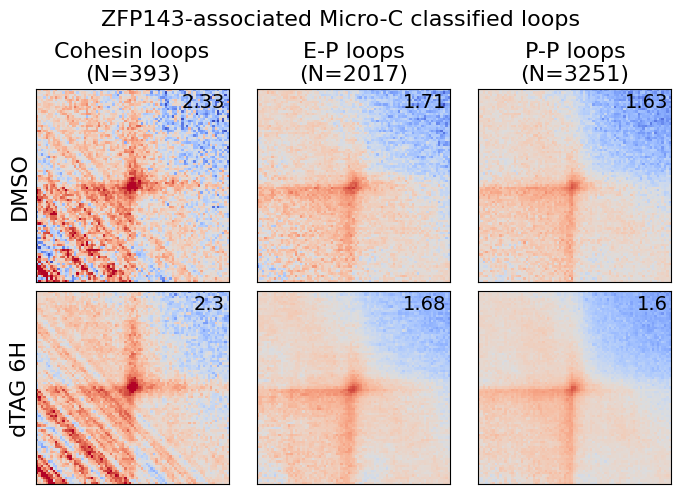

In [17]:
dmso_cohesin = pd.read_csv('/DATA/users/magnitov/znf143/hic/piles_loops_tads/ZFP143_DMSO_hsieh_2022_cohesin_loops.overlap_zfp143.txt', skiprows = 35, sep = '\s+', header = None).values
dtag_cohesin = pd.read_csv('/DATA/users/magnitov/znf143/hic/piles_loops_tads/ZFP143_dTAG_6h_hsieh_2022_cohesin_loops.overlap_zfp143.txt', skiprows = 35, sep = '\s+', header = None).values
dmso_ep = pd.read_csv('/DATA/users/magnitov/znf143/hic/piles_loops_tads/ZFP143_DMSO_hsieh_2022_EP_loops.overlap_zfp143.txt', skiprows = 35, sep = '\s+', header = None).values
dtag_ep = pd.read_csv('/DATA/users/magnitov/znf143/hic/piles_loops_tads/ZFP143_dTAG_6h_hsieh_2022_EP_loops.overlap_zfp143.txt', skiprows = 35, sep = '\s+', header = None).values
dmso_pp = pd.read_csv('/DATA/users/magnitov/znf143/hic/piles_loops_tads/ZFP143_DMSO_hsieh_2022_PP_loops.overlap_zfp143.txt', skiprows = 35, sep = '\s+', header = None).values
dtag_pp = pd.read_csv('/DATA/users/magnitov/znf143/hic/piles_loops_tads/ZFP143_dTAG_6h_hsieh_2022_PP_loops.overlap_zfp143.txt', skiprows = 35, sep = '\s+', header = None).values


fig = plt.figure(figsize = (7, 5))
plt.suptitle('ZFP143-associated Micro-C classified loops', fontsize = 16)

ax = fig.add_subplot(231)
plt.title('Cohesin loops\n(N=393)', fontsize = 16)
p = ax.matshow(np.log2(dmso_cohesin), cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.text(79, 7, str(round(np.mean([x[39:42] for x in dmso_cohesin[39:42]]), 2)), ha = 'right', fontsize = 14)
plt.ylabel('DMSO', fontsize = 16)
plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(234)
p = ax.matshow(np.log2(dtag_cohesin), cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.text(79, 7, str(round(np.mean([x[39:42] for x in dtag_cohesin[39:42]]), 2)), ha = 'right', fontsize = 14)
plt.ylabel('dTAG 6H', fontsize = 16)
plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(232)
plt.title('E-P loops\n(N=2017)', fontsize = 16)
p = ax.matshow(np.log2(dmso_ep), cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.text(79, 7, str(round(np.mean([x[39:42] for x in dmso_ep[39:42]]), 2)), ha = 'right', fontsize = 14)
plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(235)
p = ax.matshow(np.log2(dtag_ep), cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.text(79, 7, str(round(np.mean([x[39:42] for x in dtag_ep[39:42]]), 2)), ha = 'right', fontsize = 14)
plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(233)
plt.title('P-P loops\n(N=3251)', fontsize = 16)
p = ax.matshow(np.log2(dmso_pp), cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.text(79, 7, str(round(np.mean([x[39:42] for x in dmso_pp[39:42]]), 2)), ha = 'right', fontsize = 14)
plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(236)
p = ax.matshow(np.log2(dtag_pp), cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.text(79, 7, str(round(np.mean([x[39:42] for x in dtag_pp[39:42]]), 2)), ha = 'right', fontsize = 14)
plt.xticks([], [])
plt.yticks([], [])
    
plt.tight_layout()
plt.show()